In [33]:
import win32com.client




In [34]:
app = win32com.client.Dispatch("MotorCAD.AppAutomation")  # Launch Motor-CAD application


In [35]:
success,p_EMF_Pts=app.GetVariable('BackEMFPointsPerCycle')
p_EMF_Pts

import os
import numpy as np
import matplotlib.pyplot as plt

In [36]:

# Signal
List_Pos = []
List_PhaseEMF = []
for i in range(p_EMF_Pts+1):
    ex, Pos, PhaseEMF = app.GetMagneticGraphPoint('BackEMFPh1', i)
    List_Pos.append(Pos)
    List_PhaseEMF.append(PhaseEMF)

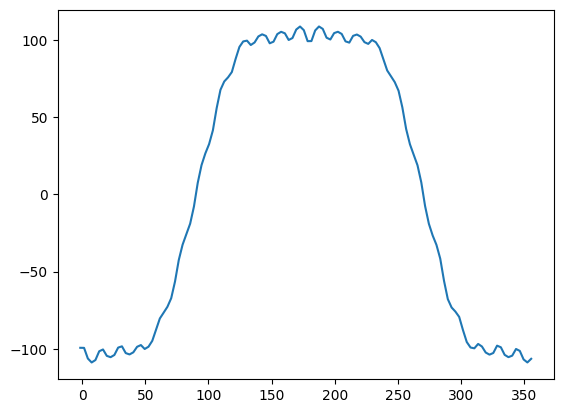

In [37]:
List_Pos=List_Pos[0:120]
List_PhaseEMF=List_PhaseEMF[0:120]
plt.plot(List_Pos[0:120], List_PhaseEMF[0:120])


In [38]:
def compare_fft(data1, data2):
    # FFT 계산
    fft_data1 = np.fft.fft(data1)
    fft_data2 = np.fft.fft(data2)

    # FFT 결과 추출
    abs_fft_data1 = 2.0 / len(data1) * np.abs(fft_data1)
    abs_fft_data2 = 2.0 / len(data2) * np.abs(fft_data2)

    # 주파수 성분 크기의 차이 계산
    diff = abs_fft_data1 - abs_fft_data2

    # 차이의 제곱합의 제곱근을 오차로 정의
    error = np.sqrt(np.sum(np.power(diff, 2)))

    return diff,error


In [39]:
def zeroOut3ncoeffs(signal):
    # 입력 시그널의 길이 계산
    n = len(signal)
    # 입력 시그널의 FFT 계산
    signal_fft = np.fft.fft(signal)
    # 0차를 가운데로 두기 위해 fftshift 함수를 사용합니다.
    signal_fft = np.fft.fftshift(signal_fft)
    # 3의 배수에 해당하는 성분 제거
    for j in range(n//12):
        signal_fft[n//2-3*(j+1)]=0 # 3의 배수(양의차수)에 해당하는 성분 제거
        signal_fft[n//2+3*(j+1)]=0 # 3의 배수(음의차수)에 해당하는 성분 제거
    # inverse FFT를 수행하여 filtering된 시그널 계산
    filtered_signal = np.fft.ifft(np.fft.ifftshift(signal_fft))
    return filtered_signal


In [40]:
MeasuredData = np.loadtxt('Z:/Thesis/Optislang_Motorcad/CalibrationBEMF/coMeasuredEMF.csv', delimiter=',')
List_PhaseEMFwo3rd=zeroOut3ncoeffs(List_PhaseEMF)

List_PhaseEMFwo3rd = List_PhaseEMFwo3rd.tolist()

In [41]:
diff, o_error=compare_fft(MeasuredData,List_PhaseEMFwo3rd)


C:\Users\KDH2018-PC\AppData\Roaming\Python\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


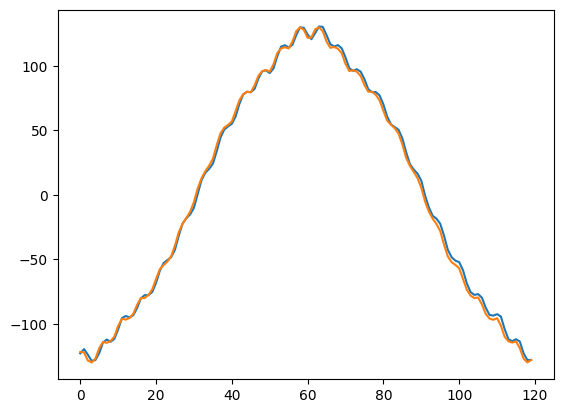

In [42]:
o_error
len(MeasuredData)
len(List_PhaseEMFwo3rd)
ShiftedX=29
ShiftedX2=0

EMFsignal1=np.concatenate((MeasuredData[ShiftedX:], MeasuredData[:ShiftedX]))
EMFsignal2=np.concatenate((List_PhaseEMFwo3rd[ShiftedX2:], List_PhaseEMFwo3rd[:ShiftedX2]))


plt.plot(EMFsignal1)
plt.plot(EMFsignal2)
# plt.plot(List_PhaseEMFwo3rd)
plt.savefig('PhaseEMFwaveform.png')    

In [29]:
def euclidean_norm(signal1, signal2):
    # 제곱 차이 계산
    diff = signal1 - signal2
    square_diff = np.power(diff, 2)
    
    # 제곱 차이의 합 계산
    sum_square_diff = np.sum(square_diff)
    
    # 제곱 차이의 합의 제곱근 계산
    norm = np.sqrt(sum_square_diff)
    
    return norm

def rmse(y_true, y_pred):
    # 실제값과 예측값의 차이 계산
    diff = y_true - y_pred
    # 차이 제곱 계산
    square_diff = np.power(diff, 2)
    # 차이 제곱의 평균 계산
    mean_square_diff = np.mean(square_diff)
    # RMSE 계산
    rmse = np.sqrt(mean_square_diff)
    return rmse

def min_max_normalize(data):
    # 데이터의 최소값과 최대값 계산
    min_val = np.min(data)
    max_val = np.max(data)
    # 최소값으로 뺀 후, 최대값에서 최소값을 나누어서 0~1 사이의 값으로 정규화
    norm_data = (data - min_val) / (max_val - min_val)
    return norm_data

In [32]:
normalEMFsignal1 = min_max_normalize(MeasuredData)
normalEMFsignal2 = min_max_normalize(List_PhaseEMFwo3rd)
diff_FFT,o_normalDataError=compare_fft(normalEMFsignal1,normalEMFsignal2)
diff_FFT,o_error=compare_fft(MeasuredData,List_PhaseEMFwo3rd)

normalRmse=rmse(normalEMFsignal1, normalEMFsignal2)


In [ ]:
normalEMFsignal1 = min_max_normalize(EMFsignal1)
normalEMFsignal2 = min_max_normalize(EMFsignal2)

norm = euclidean_norm(EMFsignal1, EMFsignal2)
normNormal=euclidean_norm(normalEMFsignal1, normalEMFsignal2)
rmsesignal = rmse(EMFsignal1, EMFsignal2)
normalRmse=rmse(normalEMFsignal1, normalEMFsignal2)
norm = np.abs(norm) # 복소수의 크기 계산
normNormal = np.abs(normNormal) # 복소수의 크기 계산
rmsesignal = np.abs(rmsesignal) # 복소수의 크기 계산
normalRmse = np.abs(normalRmse) # 복소수의 크기 계산

print(norm,normNormal,rmsesignal,normalRmse) # 33.5832713275385


In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 5, 6])

norm = euclidean_norm(x, y)
print(norm) # 1.0


In [ ]:
# 입력 데이터 생성
data =List_PhaseEMF

# zeroOut3ncoeffs 함수를 통한 필터링
filtered_signal = zeroOut3ncoeffs(data)

# fft 계산
fft_data = np.fft.fft(data)
fft_filtered = np.fft.fft(filtered_signal)

# 0차 성분이 가운데로 위치하게 shift
fft_data = np.fft.fftshift(fft_data)
fft_filtered = np.fft.fftshift(fft_filtered)

abs_fft_data1 = 2.0 / len(fft_data) * np.abs(fft_data)
abs_fft_data2 = 2.0 / len(fft_filtered) * np.abs(fft_filtered)

# x축 라벨 생성
n = len(fft_data)

# bar plot 그리기

plt.figure(figsize=(20, 6))
plt.bar(range(len(fft_data)),abs_fft_data1, width=0.8, label='original')
plt.bar(range(len(fft_data)),abs_fft_data2, width=0.4, label='filtered')
plt.xlabel('order')
plt.legend()
xticklabels=np.arange(-n//2, (n+1)//2,3).tolist()
xticks=np.arange(0,len(fft_data),3)
plt.xticks(xticks,xticklabels)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# 데이터 읽기
# FFT 계산
data1=MeasuredData
data2=List_PhaseEMFwo3rd
# FFT 계산
fft_data1 = np.fft.fft(data1)
fft_data2 = np.fft.fft(data2)

# fft 계산
fft_data = np.fft.fft(data1)
fft_filtered = np.fft.fft(data2)

# 0차 성분이 가운데로 위치하게 shift
fft_data = np.fft.fftshift(fft_data)
fft_filtered = np.fft.fftshift(fft_filtered)

abs_fft_data1 = 2.0 / len(fft_data) * np.abs(fft_data)
abs_fft_data2 = 2.0 / len(fft_filtered) * np.abs(fft_filtered)

# x축 라벨 생성
n = len(fft_data)

# 그래프 그리기
plt.figure(figsize=(20, 6))
plt.bar(range(len(fft_data)),abs_fft_data1, width=0.8, label='original')
plt.bar(range(len(fft_data)),abs_fft_data2, width=0.4, label='Simulation')
plt.bar(range(len(fft_data)),abs_fft_data1-abs_fft_data2, width=0.4, label='Difference')
plt.xlabel('order')
plt.legend()
xticklabels=np.arange(-n//2, (n+1)//2,3).tolist()
xticks=np.arange(0,len(fft_data),3)
plt.xticks(xticks,xticklabels)
plt.show()